## Data Import

In [1]:
import pandas as pd
data = pd.read_csv("/content/city_day (1).csv")
data.head(10)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,NaN,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,NaN,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,NaN,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,NaN,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,NaN,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
5,Ahmedabad,2015-01-06,NaN,NaN,NaN,38.48,81.50,NaN,45.41,45.76,46.51,5.42,10.83,1.93,NaN,NaN
6,Ahmedabad,2015-01-07,NaN,NaN,NaN,40.62,130.77,NaN,112.16,32.28,33.47,0.00,0.00,0.00,NaN,NaN
7,Ahmedabad,2015-01-08,NaN,NaN,NaN,36.74,96.75,NaN,80.87,38.54,31.89,0.00,0.00,0.00,NaN,NaN
8,Ahmedabad,2015-01-09,NaN,NaN,NaN,31.00,48.00,NaN,29.16,58.68,25.75,0.00,0.00,0.00,NaN,NaN
9,Ahmedabad,2015-01-10,NaN,NaN,NaN,7.04,0.00,NaN,NaN,8.29,4.55,0.00,0.00,0.00,NaN,NaN


In [33]:
data['Date'] = pd.to_datetime(data['Date'])
data['year'] = data['Date'].dt.year
data.head(10)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,year
0,Ahmedabad,2015-01-01,NaN,NaN,NaN,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,2015
1,Ahmedabad,2015-01-02,NaN,NaN,NaN,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,2015
2,Ahmedabad,2015-01-03,NaN,NaN,NaN,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,2015
3,Ahmedabad,2015-01-04,NaN,NaN,NaN,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,2015
4,Ahmedabad,2015-01-05,NaN,NaN,NaN,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,2015
5,Ahmedabad,2015-01-06,NaN,NaN,NaN,38.48,81.50,NaN,45.41,45.76,46.51,5.42,10.83,1.93,NaN,NaN,2015
6,Ahmedabad,2015-01-07,NaN,NaN,NaN,40.62,130.77,NaN,112.16,32.28,33.47,0.00,0.00,0.00,NaN,NaN,2015
7,Ahmedabad,2015-01-08,NaN,NaN,NaN,36.74,96.75,NaN,80.87,38.54,31.89,0.00,0.00,0.00,NaN,NaN,2015
8,Ahmedabad,2015-01-09,NaN,NaN,NaN,31.00,48.00,NaN,29.16,58.68,25.75,0.00,0.00,0.00,NaN,NaN,2015
9,Ahmedabad,2015-01-10,NaN,NaN,NaN,7.04,0.00,NaN,NaN,8.29,4.55,0.00,0.00,0.00,NaN,NaN,2015


EDA Preparation
As part of the preparation for the EDA I will:

Aggregate the numerical data per month and average it
Construct a function to re-calculate AQI_Bucket based on the monthly aggregated AQI
Construct a function to create a seperate dataframe for a particular City

In [3]:
import seaborn as sns
sns.set_style("darkgrid")

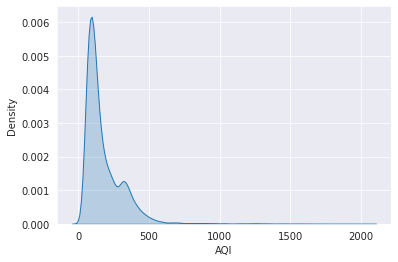

In [32]:
sns.kdeplot(data=data['AQI'], label="AQI", shade=True)

# Exploratory Data Analysis

### Which City has the lost AQI?

In [5]:
import matplotlib.pyplot as plt
aqi = data.groupby('City')['AQI'].min().reset_index()
aqi = aqi.sort_values("AQI")
aqi

,City,AQI
20,Talcher,13.0
19,Shillong,14.0
3,Amritsar,20.0
4,Bengaluru,20.0
6,Brajrajnagar,22.0
12,Hyderabad,22.0
2,Amaravati,24.0
11,Guwahati,25.0
7,Chandigarh,26.0
15,Kolkata,26.0


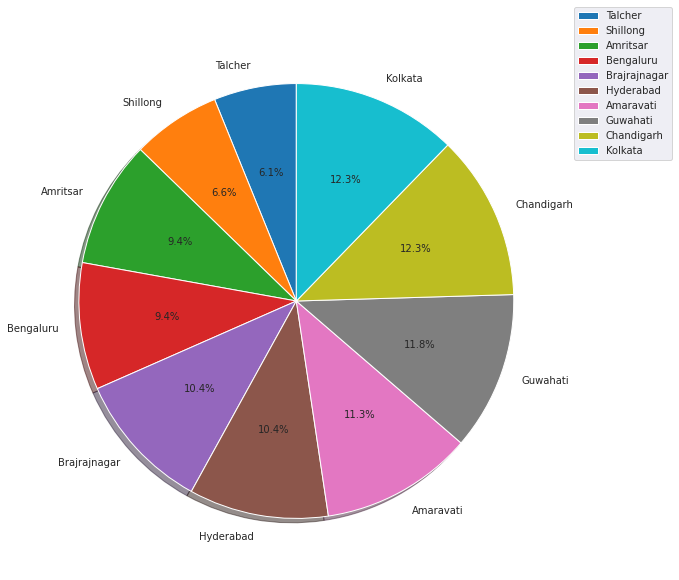

In [6]:
aqi = aqi.head(10)
fig1, ax1 = plt.subplots(figsize=(15,10))
ax1.pie(aqi["AQI"].tolist(), labels=aqi['City'].tolist(), autopct='%1.1f%%', shadow=True, startangle=90)
plt.legend(loc="right", bbox_to_anchor=(1.2,0.9))
plt.show()

In [8]:
import plotly.express as px
perc = data.loc[:, ["year", "City","AQI"]]
perc['mean_AQI']=perc.groupby([perc.City, perc.year])["AQI"].transform('mean')
perc.drop('AQI', axis=1, inplace=True)
perc = perc.drop_duplicates()
perc = perc.sort_values('year', ascending=False)
top = ['Talcher', 'Amritsar', 'Brajrajnagar']
perc = perc.loc[perc['City'].isin(top)]
perc = perc.sort_values("year")
perc = perc.fillna(100)
fig = px.bar(perc, x='City', y='mean_AQI', animation_frame="year", animation_group="City", color="City",
            hover_name="City")
fig.show()

### Which city has the highest AQI

In [9]:
aqi = data.groupby('City')['AQI'].max().reset_index()
aqi = aqi.sort_values('AQI')
aqi = aqi.tail(10)

In [10]:
aqi

,City,AQI
20,Talcher,570.0
14,Jorapokhar,604.0
18,Patna,619.0
16,Lucknow,707.0
9,Delhi,716.0
12,Hyderabad,737.0
3,Amritsar,869.0
10,Gurugram,891.0
11,Guwahati,956.0
0,Ahmedabad,2049.0


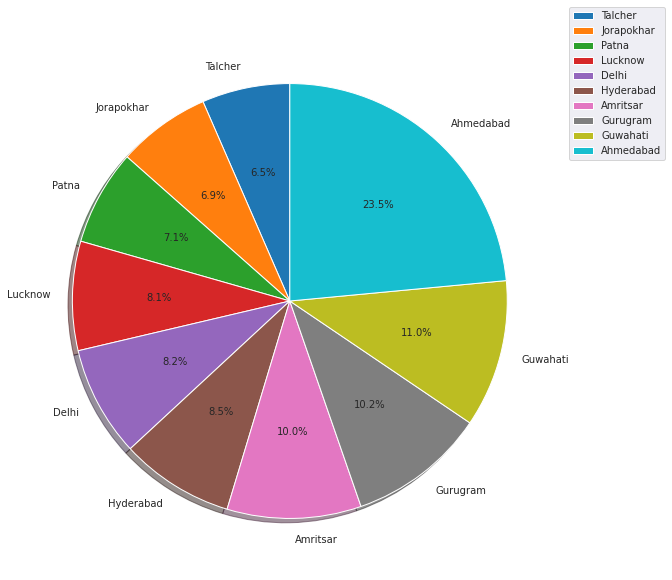

In [11]:
fig1, ax1 = plt.subplots(figsize=(15,10))
ax1.pie(aqi['AQI'].tolist(), labels=aqi['City'].tolist(), autopct='%1.1f%%', shadow=True, startangle=90)
plt.legend(loc='right', bbox_to_anchor=(1.2,0.9))
plt.show()

In [12]:
perc = data.loc[:, ["year", "City","AQI"]]
perc['mean_AQI']=perc.groupby([perc.City, perc.year])["AQI"].transform('mean')
perc.drop('AQI', axis=1, inplace=True)
perc = perc.drop_duplicates()
perc = perc.sort_values('year', ascending=False)
top1 = ['Hyderabad', 'Amritsar', 'Gurugram', 'Guwahati', 'Ahmedabad']
perc = perc.loc[perc['City'].isin(top1)]
perc = perc.sort_values(by='year')
perc = perc.fillna(100)

In [13]:
fig = px.bar(perc, x='City', y='mean_AQI', animation_frame='year', animation_group='City', color='City',
            hover_name='City')
fig.show()

### Looking at each of the cities with highest AQI

In [14]:
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,year
0,Ahmedabad,2015-01-01,NaN,NaN,NaN,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,2015
1,Ahmedabad,2015-01-02,NaN,NaN,NaN,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,2015
2,Ahmedabad,2015-01-03,NaN,NaN,NaN,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,2015
3,Ahmedabad,2015-01-04,NaN,NaN,NaN,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,2015
4,Ahmedabad,2015-01-05,NaN,NaN,NaN,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,2015


In [15]:
data1 = data['AQI'].dropna()
top_10_city = data.loc[data1.index].groupby('City')['AQI'].mean().reset_index()
top_10_city.sort_values('AQI', ascending=False, inplace=True)
top_10_city.head(10)

,City,AQI
0,Ahmedabad,473.912281
9,Delhi,262.255086
18,Patna,248.270153
10,Gurugram,230.518600
16,Lucknow,222.881833
20,Talcher,179.990506
14,Jorapokhar,162.746009
11,Guwahati,156.486683
15,Kolkata,151.535714
6,Brajrajnagar,151.519345


In [16]:
#array of the top 10 cities with highest AQI
top_cities = top_10_city.head(10)['City'].tolist()
top_cities

['Ahmedabad',
 'Delhi',
 'Patna',
 'Gurugram',
 'Lucknow',
 'Talcher',
 'Jorapokhar',
 'Guwahati',
 'Kolkata',
 'Brajrajnagar']

### Talcher AQI map

In [17]:
#year wise mean of AQI of Talcher city
talcher = data[data['City'] == "Talcher"]
data_by_year = talcher.groupby('year')['AQI'].mean().reset_index().dropna()
data_by_year.head()

,year,AQI
1,2018,185.744770
2,2019,169.023102
3,2020,201.633333


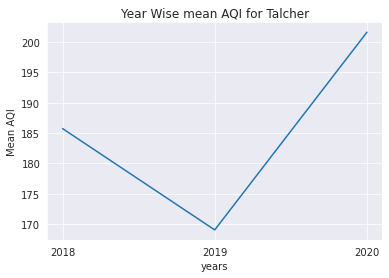

In [18]:
plt.plot(data_by_year['year'], data_by_year['AQI'])
plt.xticks(data_by_year['year'].tolist())
plt.title('Year Wise mean AQI for Talcher')
plt.xlabel("years")
plt.ylabel("Mean AQI")
plt.show()

### Brajrajnagar AQI map

In [19]:
braj = data[data['City'] == "Brajrajnagar"]
data_by_year = braj.groupby('year')['AQI'].mean().reset_index().dropna()
data_by_year.head()

,year,AQI
0,2017,247.600000
1,2018,154.996154
2,2019,148.400621
3,2020,140.762500


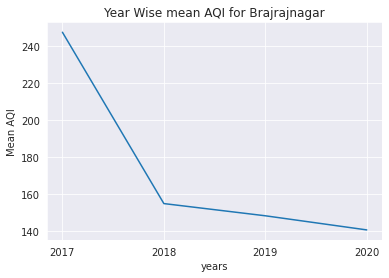

In [20]:
plt.plot(data_by_year['year'], data_by_year['AQI'])
plt.xticks(data_by_year['year'].tolist())
plt.title('Year Wise mean AQI for Brajrajnagar')
plt.xlabel("years")
plt.ylabel("Mean AQI")
plt.show()

### Plotting lineplot of year wise AQI of all cities

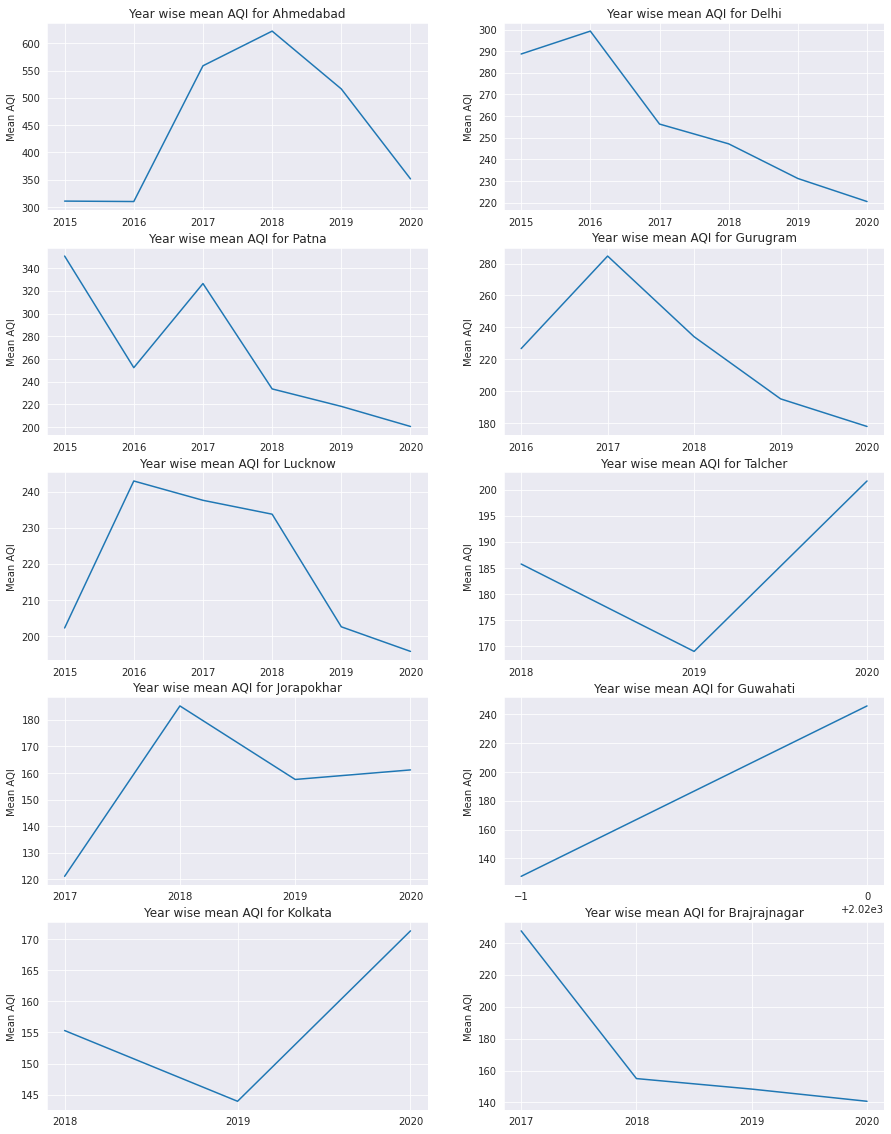

In [21]:
fig = plt.figure(figsize=(15,20))
for city, num in zip(top_cities, range(1,11)):
    df = data[data["City"]==city]
    data_by_year = df.groupby('year')['AQI'].mean().reset_index().dropna()
    ax = fig.add_subplot(5,2,num)
    ax.plot(data_by_year['year'],data_by_year['AQI'])
    ax.set_xticks(data_by_year['year'].tolist())
    ax.set_title("Year wise mean AQI for {}".format(city))
    ax.set_ylabel('Mean AQI')

### which city has the highest NO

In [22]:
data.head(10)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,year
0,Ahmedabad,2015-01-01,NaN,NaN,NaN,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,2015
1,Ahmedabad,2015-01-02,NaN,NaN,NaN,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,2015
2,Ahmedabad,2015-01-03,NaN,NaN,NaN,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,2015
3,Ahmedabad,2015-01-04,NaN,NaN,NaN,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,2015
4,Ahmedabad,2015-01-05,NaN,NaN,NaN,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,2015
5,Ahmedabad,2015-01-06,NaN,NaN,NaN,38.48,81.50,NaN,45.41,45.76,46.51,5.42,10.83,1.93,NaN,NaN,2015
6,Ahmedabad,2015-01-07,NaN,NaN,NaN,40.62,130.77,NaN,112.16,32.28,33.47,0.00,0.00,0.00,NaN,NaN,2015
7,Ahmedabad,2015-01-08,NaN,NaN,NaN,36.74,96.75,NaN,80.87,38.54,31.89,0.00,0.00,0.00,NaN,NaN,2015
8,Ahmedabad,2015-01-09,NaN,NaN,NaN,31.00,48.00,NaN,29.16,58.68,25.75,0.00,0.00,0.00,NaN,NaN,2015
9,Ahmedabad,2015-01-10,NaN,NaN,NaN,7.04,0.00,NaN,NaN,8.29,4.55,0.00,0.00,0.00,NaN,NaN,2015


In [23]:
df = data.fillna(0.0)

In [24]:
no = df.groupby('City')['NO'].mean().reset_index()
no = no.sort_values("NO")

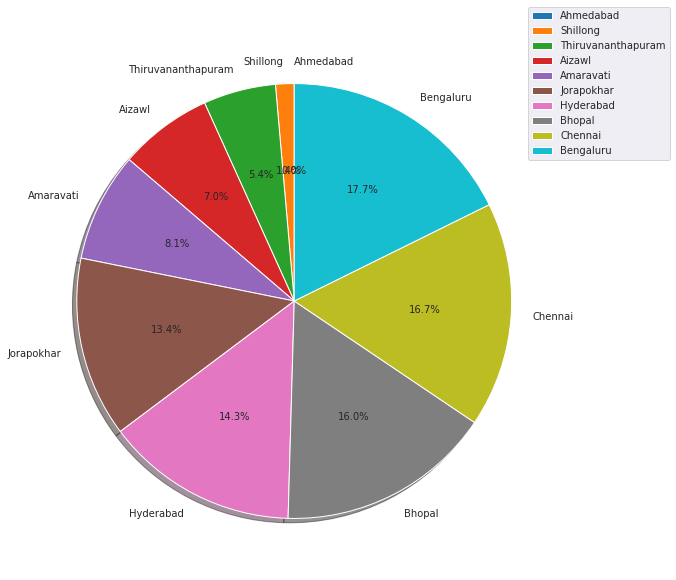

In [25]:
no=no.head(10)
fig1, ax1 = plt.subplots(figsize=(15,10))
ax1.pie(no['NO'].tolist(), labels=no['City'].tolist(), autopct='%1.1f%%', shadow=True, startangle=90)
plt.legend(loc='right', bbox_to_anchor=(1.2,0.9))
plt.show()

In [26]:
perc = df.loc[:, ["year", "City","NO"]]
perc['mean_NO']=perc.groupby([perc.City, perc.year])["NO"].transform('mean')
perc.drop('NO', axis=1, inplace=True)
perc = perc.drop_duplicates()
perc = perc.sort_values('year', ascending=False)
top2 = ['Hyderbad', 'Bhopal', 'Jorapokhar', 'Chennai', 'Bengaluru']
perc = perc.loc[perc['City'].isin(top2)]
perc = perc.sort_values("year")
perc = perc.fillna(100)
fig = px.bar(perc, x='City', y='mean_NO', animation_frame="year", animation_group="City", color="City",
            hover_name="City")
fig.show()

## Distribution of NO, NO2 and others

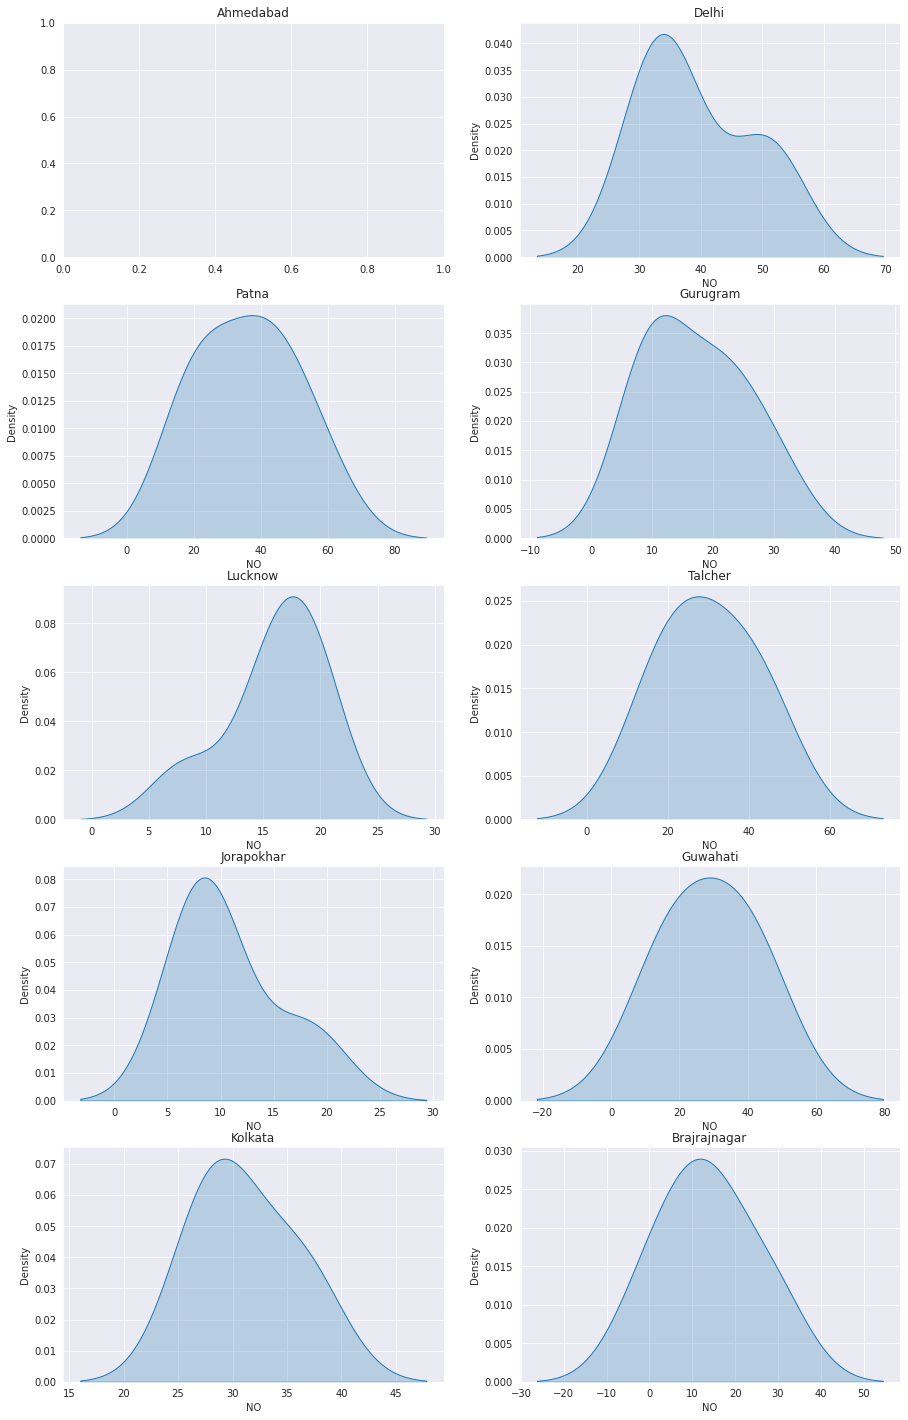

In [27]:
# city wise distribution of NO
fig = plt.figure(figsize=(15,25))
for city, num in zip(top_cities, range(1,11)):
    df = data[data['City']==city]
    df = df.groupby('year')['NO'].mean().reset_index().dropna()
    ax = fig.add_subplot(5,2,num)
    ax.set_title(city)
    sns.kdeplot(data=df['NO'], label="NO", shade=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



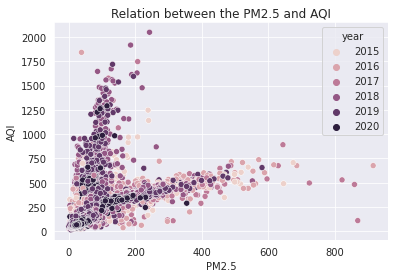

In [28]:
sns.scatterplot('PM2.5', 'AQI', hue='year', data=data)
plt.title("Relation between the PM2.5 and AQI")
plt.xlabel('PM2.5')
plt.ylabel('AQI')
plt.show()

In [29]:
data.head(2)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,year
0,Ahmedabad,2015-01-01,NaN,NaN,NaN,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,2015
1,Ahmedabad,2015-01-02,NaN,NaN,NaN,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,2015


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning

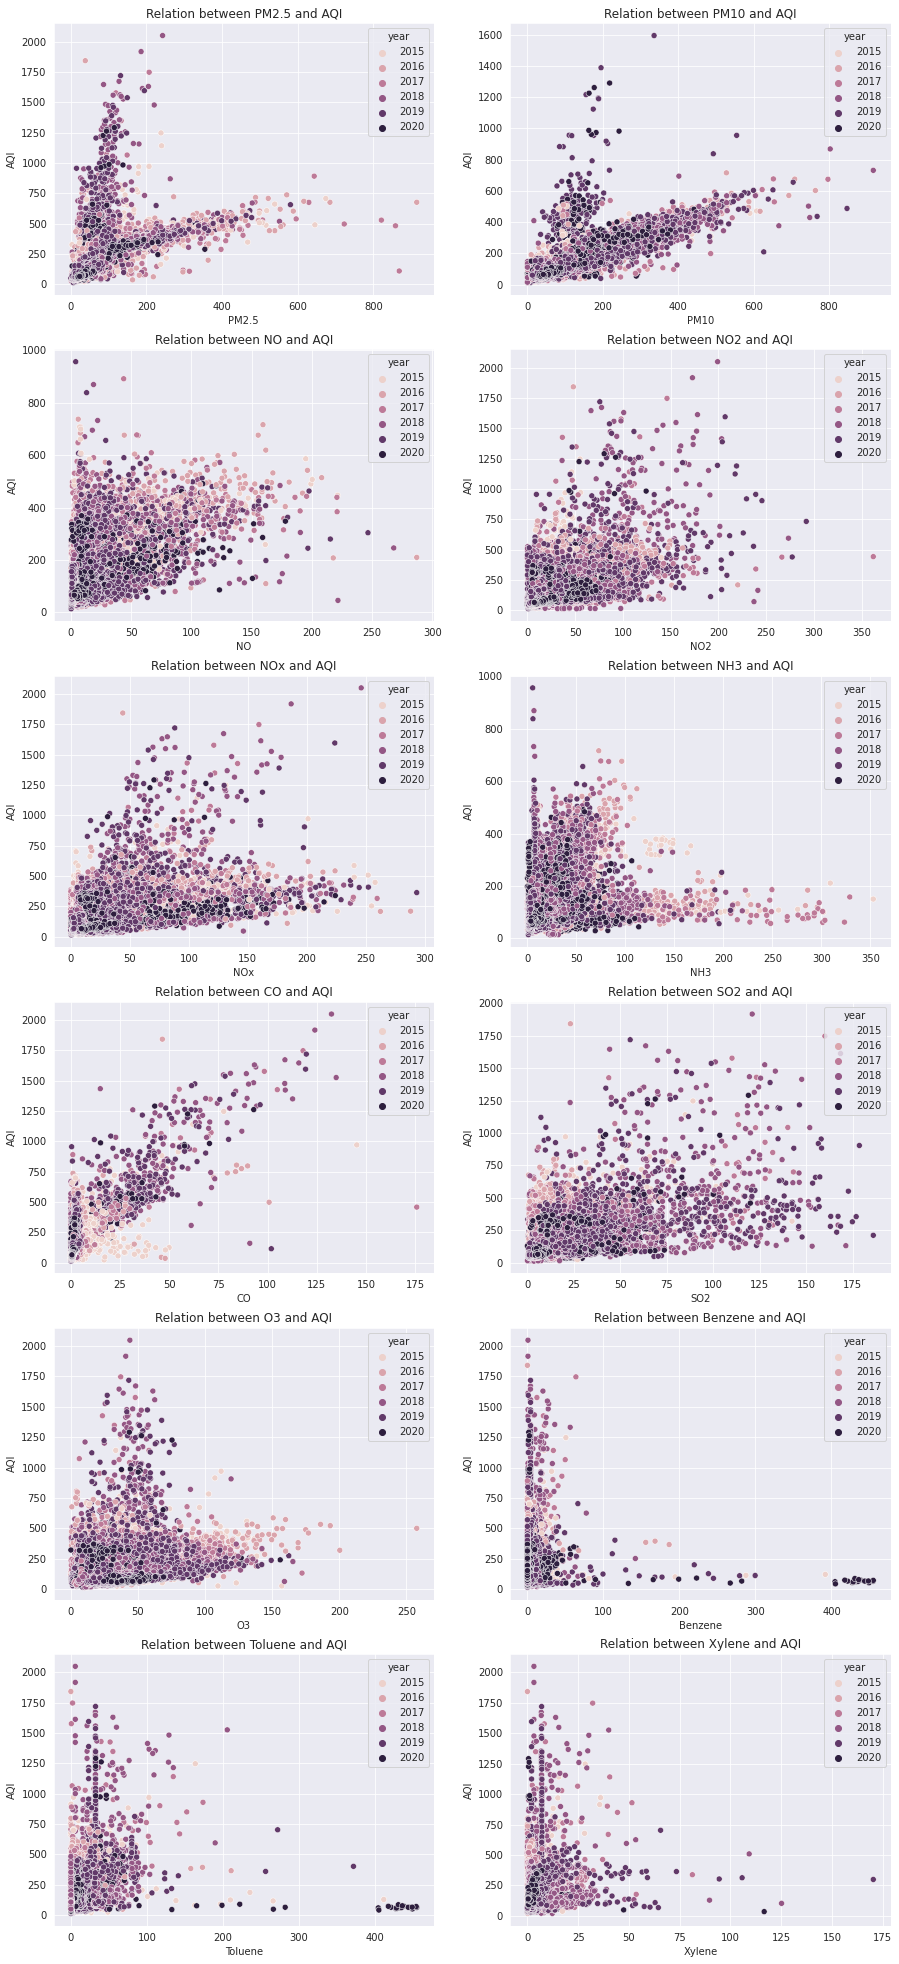

In [30]:
variables = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx',"NH3",'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
fig= plt.figure(figsize=(15,35))
for variable, num in zip(variables, range(1, len(variables) + 1)):
    ax = fig.add_subplot(6,2,num)
    sns.scatterplot(variable, 'AQI', hue='year', data=data)
    plt.title('Relation between {} and AQI'.format(variable))
    plt.xlabel(variable)
    plt.ylabel('AQI')

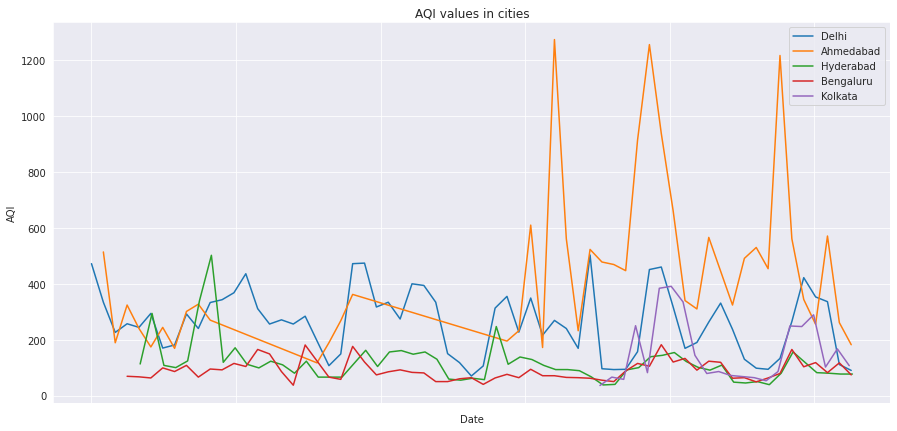

In [31]:
# Linechart of cities (AQI vs Date)
cities = ['Delhi', 'Ahmedabad', 'Hyderabad', 'Bengaluru', 'Kolkata']
fig, ax = plt.subplots(figsize=(15,7))

for city in cities:
    sns.lineplot(x="Date", y="AQI", data=data[data['City']==city].iloc[::30], label=city)

ax.set_xticklabels(ax.get_xticklabels(cities), rotation=45, ha='leaf')

ax.set_title('AQI values in cities')
ax.legend()